# Data transformation and outlier detection

Gensor provides some simple ways to find and eliminate outliers from the data. It can also be used in combination, for example we can first transform the data and then remove outliers, what can be an effective strategy in some cases. Below we quickly get the dataset created in the previous tutorial.

Loading file: /workspaces/gensor/gensor/testdata/PB02A_plain.csv
Skipping file /workspaces/gensor/gensor/testdata/PB02A_plain.csv due to missing metadata.
Loading file: /workspaces/gensor/gensor/testdata/Barodiver_220427183008_BY222.csv
Loading file: /workspaces/gensor/gensor/testdata/PB01A_moni_AV319_220427183019_AV319.csv
Loading file: /workspaces/gensor/gensor/testdata/PB02A_plain.csv
<class 'gensor.core.dataset.Dataset'>


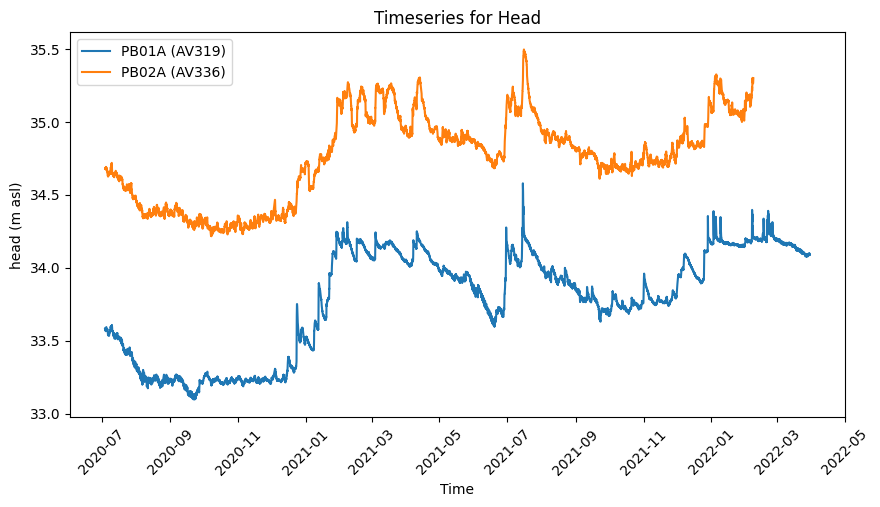

In [15]:
import gensor as gs
from gensor.testdata import all_paths, pb02a_plain

from gensor import read_from_csv

pattern = r'[A-Za-z]{2}\d{2}[A-Za-z]{1}|Barodiver'

ds = read_from_csv(path=all_paths, 
                    file_format='vanessen', 
                    location_pattern=pattern)


ds2 = read_from_csv(path=pb02a_plain, 
                    file_format='plain', 
                    location='PB02A',
                    sensor='AV336')

ds.add(ds2)

baro = ds.filter(stations='Barodiver', variables='pressure')

alts = {
    "PB01A": 31.48,
    "PB02A": 31.68
    }

groundwater_ds = ds.filter(stations=alts.keys(), variables="pressure")

for ts in groundwater_ds:
    ts.sensor_alt = alts.get(ts.location)
    
fieldwork_days = {"PB01A": ['2020-08-25', '2020-10-20', '2020-11-18', '2020-12-03', '2020-12-08',
                  '2021-02-17', '2021-03-10', '2021-04-14', '2021-05-18', '2021-05-27',
                  '2021-08-17', '2021-09-16'],
                  "PB02A": ['2020-08-25', '2020-10-20', '2020-11-18', '2020-12-03', '2020-12-08',
                  '2021-02-17', '2021-03-10', '2021-04-14', '2021-05-18', '2021-05-27',
                  '2021-08-17', '2021-09-16', '2021-04-26']}

compensated_ds = gs.compensate(groundwater_ds, baro, fieldwork_dates=fieldwork_days, interpolate_method='linear')
compensated_ds.plot()

## Basic transformation

Timeseries object has a few options to transform the data in case you need to perform tasks like outlier detection or when you are going to use machine learning algorithms. For all the methods available consult the api reference. 

*The examples of transformation will be updated soon.*